# Classificação e Regressão.

#### Importando bibliotecas

In [158]:
import pandas as pd
import numpy as np

# modelos
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

# Separação dos Dados entre treino e teste
from sklearn.model_selection import train_test_split

# Análise dos Erros
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# graficos
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Mensagens
import warnings
warnings.filterwarnings('ignore')


#### Lendo arquivo CSV

In [159]:
dados = pd.read_csv("FuelConsumptionCo2.csv")

#### Nomes das features do dataset.

In [160]:
dados.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

#### Verificando campos nulos.

In [161]:
dados.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

#### Tipos de dados de cada features.

In [162]:
dados.dtypes

MODELYEAR                     int64
MAKE                         object
MODEL                        object
VEHICLECLASS                 object
ENGINESIZE                  float64
CYLINDERS                     int64
TRANSMISSION                 object
FUELTYPE                     object
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
CO2EMISSIONS                  int64
dtype: object

#### Ultimas 5 amostras.

In [163]:
dados.tail()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260
1066,2014,VOLVO,XC90 AWD,SUV - STANDARD,3.2,6,AS6,X,14.9,10.2,12.8,22,294


### 1. Exibir a Matriz de Correlação entre as variáveis 

Analisando Correlação


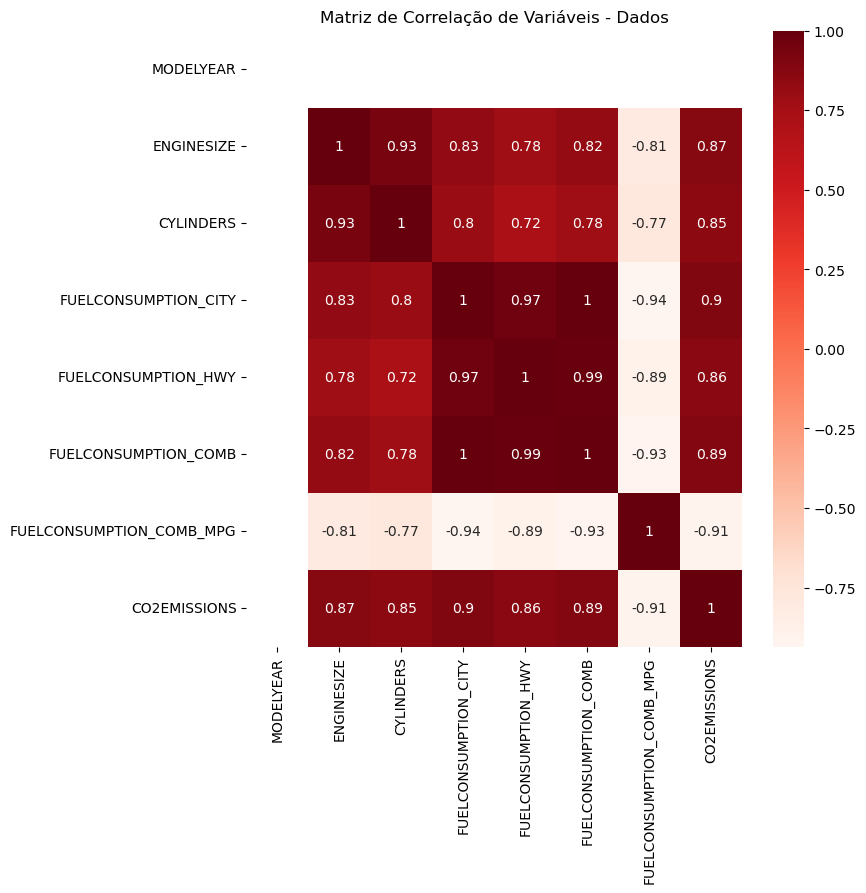

In [164]:
print("="*50)
print("Analisando Correlação")
plt.figure(figsize = (8,8))
sns.heatmap(dados.corr(), annot = True, cmap = 'Reds')
plt.title(f"Matriz de Correlação de Variáveis - Dados")
plt.show()

### 2. Executar um algoritmo para realizar a Seleção de Features mais relevantes para o modelo

In [165]:
dados2 = dados[['CO2EMISSIONS','FUELCONSUMPTION_COMB_MPG', 'FUELCONSUMPTION_COMB', 'ENGINESIZE', 'FUELCONSUMPTION_HWY']]
dados2.tail()

,CO2EMISSIONS,FUELCONSUMPTION_COMB_MPG,FUELCONSUMPTION_COMB,ENGINESIZE,FUELCONSUMPTION_HWY
1062,271,24,11.8,3.0,9.8
1063,264,25,11.5,3.2,9.5
1064,271,24,11.8,3.0,9.8
1065,260,25,11.3,3.2,9.3
1066,294,22,12.8,3.2,10.2


In [166]:
dados3 = dados[['ENGINESIZE','CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
dados3.tail()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
1062,3.0,6,11.8,271
1063,3.2,6,11.5,264
1064,3.0,6,11.8,271
1065,3.2,6,11.3,260
1066,3.2,6,12.8,294


### 3. Atualize os nomes das seguintes colunas para facilitar a identificação no modelo

In [167]:
dados2 = dados2.rename(columns={ 'FUELCONSUMPTION_COMB_MPG':'FUELCONSCOMBMPG','FUELCONSUMPTION_COMB':'FUELCONSCOMB','ENGINESIZE':'TAM_MOTOR', 'FUELCONSUMPTION_HWY':'FUELCONSHWY'})
dados2.sample(3)

,CO2EMISSIONS,FUELCONSCOMBMPG,FUELCONSCOMB,TAM_MOTOR,FUELCONSHWY
885,274,24,11.9,3.8,9.6
657,221,29,9.6,3.5,7.6
276,246,26,10.7,2.4,8.1


In [168]:
dados3 = dados3.rename(columns={ 'FUELCONSUMPTION_COMB':'FUELCONSCOMB'})
dados3.sample(3)

,ENGINESIZE,CYLINDERS,FUELCONSCOMB,CO2EMISSIONS
293,2.4,4,9.8,225
142,1.4,4,8.5,196
49,4.2,8,17.7,407


### 4. Crie um novo dataframe com as features mais relevantes

In [169]:
dados2.sample(3)

,CO2EMISSIONS,FUELCONSCOMBMPG,FUELCONSCOMB,TAM_MOTOR,FUELCONSHWY
572,248,26,10.8,3.2,8.8
547,237,27,10.3,3.0,8.4
49,407,16,17.7,4.2,13.4


In [170]:
dados3.sample(3)

,ENGINESIZE,CYLINDERS,FUELCONSCOMB,CO2EMISSIONS
568,5.0,8,13.5,310
974,1.8,4,7.1,163
1008,2.7,4,10.0,230


### 5. Análises

#### 5.1. Separe os dados de treino e teste.

In [171]:
# Separando as colunas de interesse
A = np.asarray([dados3['ENGINESIZE']])
B = np.asarray([dados3['FUELCONSCOMB']])
X = np.asarray([dados3['CYLINDERS']])
y = np.asarray([dados3['CO2EMISSIONS']])

X_train, X_test, y_train, y_test = train_test_split(X.T, y.T, test_size = 0.2, random_state = 42)
A_train, A_test, y_train, y_test = train_test_split(A.T, y.T, test_size = 0.2, random_state = 42)
B_train, B_test, y_train, y_test = train_test_split(B.T, y.T, test_size = 0.2, random_state = 42)

#### 5.2. Import sklearn library.

In [172]:
# Importada no inicio do documento Jutyter Notebook

#### 5.3. Crie a variável com o modelo de Regressão Linear.

In [173]:
lr = LinearRegression()
lrA = LinearRegression()
lrB = LinearRegression()

#### 5.4. Separe os dados de treino e teste.

In [174]:
# Treinar Modelo
lr.fit(X_train, y_train)
lrA.fit(A_train, y_train)
lrB.fit(B_train, y_train)

LinearRegression()

#### 5.5. Separe as Features de Treino e Teste.

In [175]:
# Predição dos dados de Teste
y_pred = lr.predict(X_test)
y_predA = lrA.predict(A_test)
y_predB = lrB.predict(B_test)

#### 5.6. Rode o Modelo.

In [176]:
# Verificação dos Erros
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
# Calcular o R Squared
r2 = r2_score(y_test, y_pred)

# Print dos Valores
print("MSE Value:", round(mse, 2) )
print("RMSE value:", round(rmse, 2) )
print("R2 value:", round(r2, 2) )

MSE Value: 1109.35
RMSE value: 33.31
R2 value: 0.73


In [177]:
# Verificação dos Erros
mseA = mean_squared_error(y_test, y_predA)
rmseA = np.sqrt(mseA)
# Calcular o R Squared
r2A = r2_score(y_test, y_predA)

# Print dos Valores
print("MSE Value:", round(mseA, 2) )
print("RMSE value:", round(rmseA, 2) )
print("R2 value:", round(r2A, 2) )

MSE Value: 985.94
RMSE value: 31.4
R2 value: 0.76


In [178]:
# Verificação dos Erros
mseB = mean_squared_error(y_test, y_predB)
rmseB = np.sqrt(mseB)
# Calcular o R Squared
r2B = r2_score(y_test, y_predB)

# Print dos Valores
print("MSE Value:", round(mseB, 2) )
print("RMSE value:", round(rmseB, 2) )
print("R2 value:", round(r2B, 2) )

MSE Value: 797.43
RMSE value: 28.24
R2 value: 0.81


#### 5.7. Defina os valores para os coeficientes Theta 0: Intercepto e Theta 1: Coeficiente.

In [179]:
print ('Coefficients: ', lr.coef_)
print ('Intercept: ', lr.intercept_)

print ('\nCoefficients A: ', lrA.coef_)
print ('Intercept A: ', lrA.intercept_)

print ('\nCoefficients B: ', lrB.coef_)
print ('Intercept B: ', lrB.intercept_)

Coefficients:  [[29.47839879]]
Intercept:  [86.08850036]

Coefficients A:  [[38.99297872]]
Intercept A:  [126.28970217]

Coefficients B:  [[16.18090078]]
Intercept B:  [69.10302618]


#### 5.8. Plot o Gráfico de Regressão Linear com a Reta Ajustada.

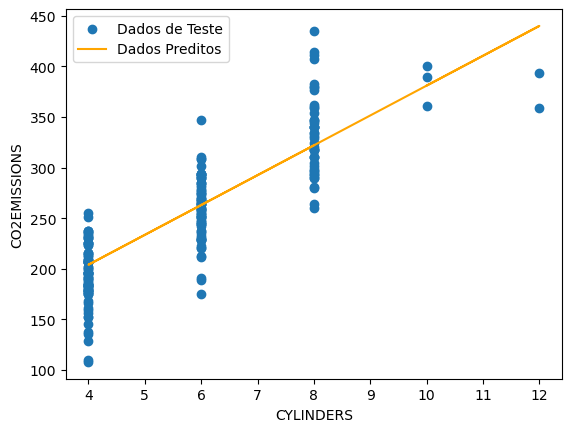

In [180]:
plt.scatter(X_test, y_test, label = "Dados de Teste")
plt.plot(X_test, y_pred, c = "orange", label = "Dados Preditos")
plt.xlabel("CYLINDERS")
plt.ylabel("CO2EMISSIONS")
plt.legend()
plt.show()

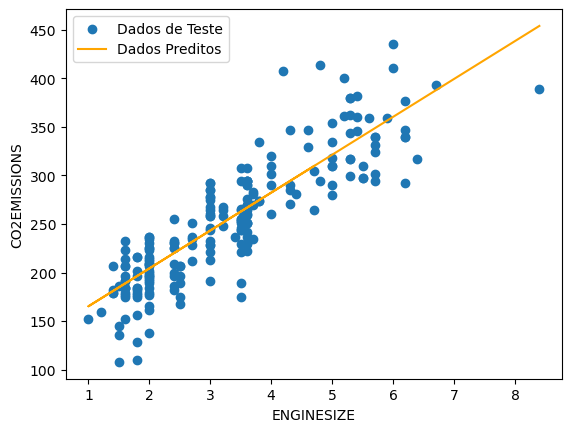

In [181]:
plt.scatter(A_test, y_test, label = "Dados de Teste")
plt.plot(A_test, y_predA, c = "orange", label = "Dados Preditos")
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.legend()
plt.show()

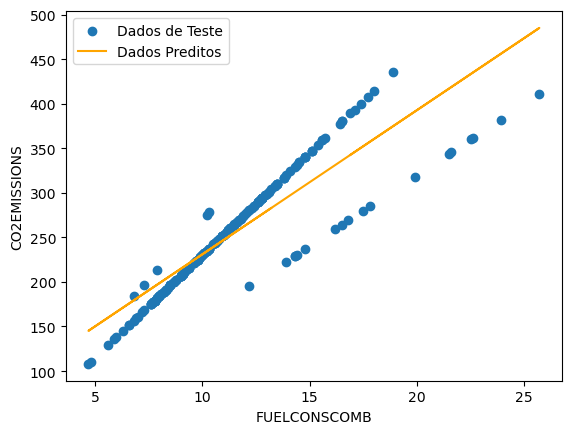

In [182]:
plt.scatter(B_test, y_test, label = "Dados de Teste")
plt.plot(B_test, y_predB, c = "orange", label = "Dados Preditos")
plt.xlabel("FUELCONSCOMB")
plt.ylabel("CO2EMISSIONS")
plt.legend()
plt.show()

### 6. Defina um Baseline para que sirva de comparação

##### Baseline X

In [183]:
print("Baseline.")
print("MSE Value:", round(mse, 2) )
print("RMSE value:", round(rmse, 2) )
print("R2 value:", round(r2, 2) )

Baseline.
MSE Value: 1109.35
RMSE value: 33.31
R2 value: 0.73


### 7. Encontre o Melhor ajuste (R2-Score) e o Erro Médio Quadrático (SME e RMSE)

#### 7.1.  Rode mais de um modelo para obter o melhor ajuste.

#### Baseline A.

In [184]:
print("MSE Value:", round(mseA, 2) )
print("RMSE value:", round(rmseA, 2) )
print("R2 value:", round(r2A, 2) )

MSE Value: 985.94
RMSE value: 31.4
R2 value: 0.76


#### Baseline B.

In [185]:
print("MSE Value:", round(mseB, 2) )
print("RMSE value:", round(rmseB, 2) )
print("R2 value:", round(r2B, 2) )

MSE Value: 797.43
RMSE value: 28.24
R2 value: 0.81


### 8. Com base no algoritmo de Regressão Linear Simples, elabore outro um algoritmo de Regressão Linear Múltipla e compare a performance entre os dois Modelos.

In [186]:
dados2.sample(2)

,CO2EMISSIONS,FUELCONSCOMBMPG,FUELCONSCOMB,TAM_MOTOR,FUELCONSHWY
647,338,19,14.7,5.0,12.3
603,193,34,8.4,2.0,6.6


In [187]:
##############################################
# Separando as colunas de interesse
A = np.asarray([dados2['FUELCONSCOMBMPG']])
B = np.asarray([dados2['FUELCONSCOMB']])
X = np.asarray([dados2['FUELCONSHWY']])
y = np.asarray([dados2['CO2EMISSIONS']])
##############################################
X_train, X_test, y_train, y_test = train_test_split(X.T, y.T, test_size = 0.2, random_state = 42)
A_train, A_test, y_train, y_test = train_test_split(A.T, y.T, test_size = 0.2, random_state = 42)
B_train, B_test, y_train, y_test = train_test_split(B.T, y.T, test_size = 0.2, random_state = 42)
##############################################
lr = LinearRegression()
lrA = LinearRegression()
lrB = LinearRegression()
##############################################
lr.fit(X_train, y_train)
lrA.fit(A_train, y_train)
lrB.fit(B_train, y_train)
##############################################
# Predição dos dados de Teste
y_pred = lr.predict(X_test)
y_predA = lrA.predict(A_test)
y_predB = lrB.predict(B_test)
##############################################
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
# Calcular o R Squared
r2 = r2_score(y_test, y_pred)

# Print dos Valores
print("\nMSE Value:", round(mse, 2) )
print("RMSE value:", round(rmse, 2) )
print("R2 value:", round(r2, 2) )
##############################################
# Verificação dos Erros
mseA = mean_squared_error(y_test, y_predA)
rmseA = np.sqrt(mseA)
# Calcular o R Squared
r2A = r2_score(y_test, y_predA)

# Print dos Valores
print("\nMSE Value:", round(mseA, 2) )
print("RMSE value:", round(rmseA, 2) )
print("R2 value:", round(r2A, 2) )
##############################################
# Verificação dos Erros
mseB = mean_squared_error(y_test, y_predB)
rmseB = np.sqrt(mseB)
# Calcular o R Squared
r2B = r2_score(y_test, y_predB)

# Print dos Valores
print("\nMSE Value:", round(mseB, 2) )
print("RMSE value:", round(rmseB, 2) )
print("R2 value:", round(r2B, 2) )
##############################################


MSE Value: 1026.46
RMSE value: 32.04
R2 value: 0.75

MSE Value: 776.21
RMSE value: 27.86
R2 value: 0.81

MSE Value: 797.43
RMSE value: 28.24
R2 value: 0.81


#### Plot o Gráfico de Regressão Linear com a Reta Ajustada, 2º modelo.

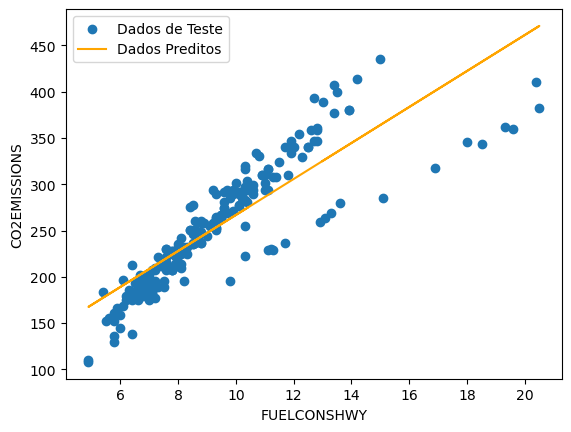

In [188]:
plt.scatter(X_test, y_test, label = "Dados de Teste")
plt.plot(X_test, y_pred, c = "orange", label = "Dados Preditos")
plt.xlabel("FUELCONSHWY")
plt.ylabel("CO2EMISSIONS")
plt.legend()
plt.show()

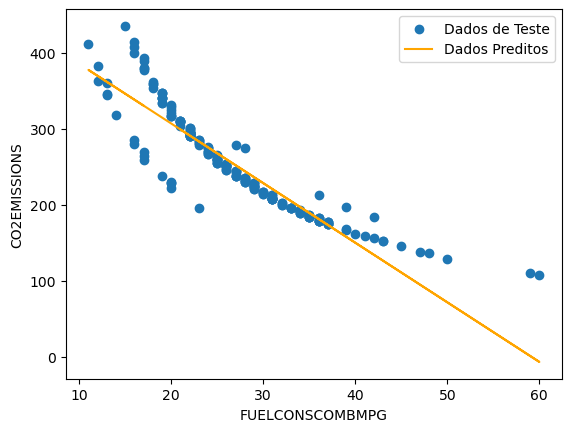

In [189]:
plt.scatter(A_test, y_test, label = "Dados de Teste")
plt.plot(A_test, y_predA, c = "orange", label = "Dados Preditos")
plt.xlabel("FUELCONSCOMBMPG")
plt.ylabel("CO2EMISSIONS")
plt.legend()
plt.show()

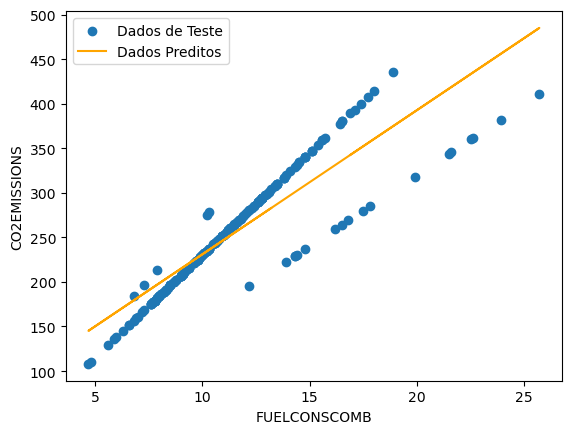

In [190]:
plt.scatter(B_test, y_test, label = "Dados de Teste")
plt.plot(B_test, y_predB, c = "orange", label = "Dados Preditos")
plt.xlabel("FUELCONSCOMB")
plt.ylabel("CO2EMISSIONS")
plt.legend()
plt.show()